# Exercício de Programação 4: SVD truncado


<font color="red">**Prazo de submissão: 23:55 do dia 27/09/2019** </font>

2019.2 Álgebra Linear Computacional - DCC - UFMG

Erickson - Fabricio - Renato

Instruções:
* Antes de submeter suas soluções, certifique-se de que tudo roda como esperado. Primeiro, **reinicie o kernel** no menu, selecione Kernel$\rightarrow$Restart e então execute **todas as células** (no menu, Cell$\rightarrow$Run All)
* Apenas o arquivo .ipynb deve ser submetido. Ele não deve ser compactado.
* Não deixe de preencher seu nome e número de matrícula na célula a seguir

**Nome do aluno:** Victor Vieira de Melo

**Matricula:** 2019055028

Neste exercício vamos estudar as aproximações obtidas pelo SVD truncado. Vamos começar carregando os dados do 20_newsgroups.

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)

vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [3]:
%time U, s, Vt = linalg.svd(vectors, full_matrices=False)

CPU times: user 2min 38s, sys: 22 s, total: 3min
Wall time: 26.4 s


## Questão 1

Plote uma curva contendo os valores singulares $s$. Para ver exemplos de como gerar um gráfico (plot), você pode consultar o [tutorial do pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html).

Text(0, 0.5, 'valores singulares')

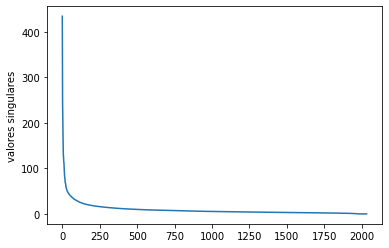

In [4]:
# solucao da Questao 1

### BEGIN SOLUTION

plt.plot(s)

### END SOLUTION
plt.ylabel('valores singulares')

## Questão 2

Repita o gráfico da questão anterior, mas desta vez, tente dar um "zoom" para mostrar onde está o joelho da curva, ou seja, o ponto a partir do qual os valores passam a ser muito baixos. Para isto, você pode pegar um slice de ```s```, ou usar a função ```plt.xlims```.

Text(0, 0.5, 'valores singulares')

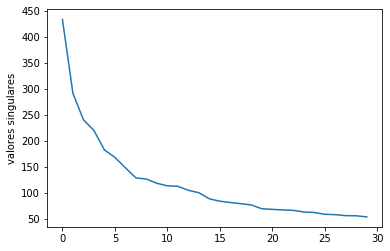

In [5]:
# solucao da Questao 2

### BEGIN SOLUTION

plt.plot(s[:30])

### END SOLUTION
plt.ylabel('valores singulares')

## Questão 3

Seja $A$ uma matriz $m \times n$. O SVD reduzido de $A$ retorna $U_{m \times k}$, $\Sigma_{k \times k}$ e $V^\top_{k \times n}$, onde $k = \min(m,n)$. Já o SVD truncado de posto $r < \min(m,n)$ retorna apenas as $r$ primeiras colunas de $U$, os $r$ maiores valores singulares de $\Sigma$ e as $r$ primeiras linhas de $V^\top$.

Uma propriedade importante do SVD truncado é que ele retorna a melhor aproximação $A_r$ para uma matriz $A$ dentre todas as matrizes de posto $r$, onde a qualidade da aproximação é medida por $\| A - A_r \|_F$, sendo $\| B \|_F = \sqrt{\sum_i \sum_j B_{i,j}^2}$ a norma de Frobenius de uma matriz $B$.

Nesta questão, vamos ver como a qualidade da aproximação aumenta com $r$, variando $r$ em $\{1,2,4,\ldots,2^7\}$. Primeiramente, vamos encontrar a decomposição SVD reduzida para a matriz ```vectors```. Depois disso, vamos variar o número $r$ de valores singulares considerados para encontrar aproximações $A_r$ para, finalmente, calcular $\| A - A_r \|_F$. Para facilitar a resolução deste problema, parte do código já foi fornecida. Para calcular a norma Frobenius, consulte a documentação de ```np.linalg.norm```.

Text(0.5, 0, 'r')

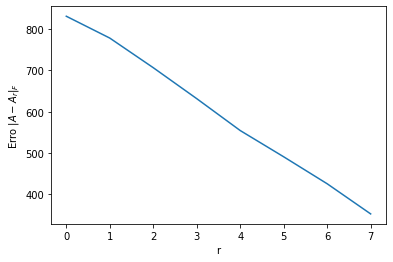

In [6]:
#solucao da Questao 3

m,n = vectors.shape
k = min(m,n)

A_r = np.zeros((m,n))
erro = np.zeros(8)
r_values = 2**np.arange(8)
U, sig, Vt = np.linalg.svd(vectors, full_matrices=False)
for i in range(len(r_values)):
    r = r_values[i]
    ### BEGIN SOLUTION
    # calcular a aproximacao A_r de posto r para A
    A_r = U[:,:r] @ np.diag(sig[:r]) @ Vt[:r,:]
    
    subMatrices = vectors - A_r
    erro[i] = np.linalg.norm(subMatrices,'fro')

    ### END SOLUTION

# código para plotar o vetor erro
### BEGIN SOLUTION
plt.plot(erro)

### END SOLUTION
plt.ylabel(r'Erro $\|A-A_r\|_F$')
plt.xlabel('r')

## Questão 4

Vamos criar e implementar uma heurística para a escolha de $k$. Deseja-se obter uma representação de baixa dimensão $k$ para a matriz ```vectors```. Implemente uma função que recebe um vetor de valores singulares em ordem decrescente e retorna o número de valores singulares que é maior ou igual a 2x a média. (Dica: você pode usar ```np.mean```).

In [7]:
# solucao da Questao 4

def escolheK(s):
    """ Retorna o inteiro k contendo o número de valores singulares que é pelo menos 2x maior que a média.
    
        Entrada:
            s é um vetor contendo os valores singulares em ordem decrescente
    """
    k = 0
    ### BEGIN SOLUTION
    media = np.mean(s)
    for n in s:
        if n >= 2*media:
            k = k+1

    ### END SOLUTION
    return k

In [8]:
s_example = np.hstack((np.arange(1000,100,-100),np.arange(100,10,-10),np.arange(10,1,-1)))
print(s_example)

assert escolheK(s_example) == 6
assert escolheK(s) == 191

[1000  900  800  700  600  500  400  300  200  100   90   80   70   60
   50   40   30   20   10    9    8    7    6    5    4    3    2]


## Questão 5

Nessa questão é criado um conjunto de dados aleatórios em $3$ dimensões. Após isso é encontrada a [função de densidade de probabilidade](https://pt.wikipedia.org/wiki/Função_densidade) dos dados. Depois é feita uma normalização sobre os dados. Em seguida você deve:
* utilizar a função ```sklearn.decomposition.PCA```,
* pegar as duas principais componentes do conjunto de dados ```Y``` na função ```plot_figs```, e
* atribuir as componentes a váriavel ```V```.

Em seguida realizamos o *plot* dos dados em um gráfico tridimensional, você pode tentar gerar um gráfico interativo utilizando os códigos ```# %matplotlib notebook``` ou ```%matplotlib ipympl```. Caso nenhum dos dois funcione você pode executar o plot da maneira normal ```%matplotlib inline``` pórem com pontos de vista  diferentes.

In [9]:
# Authors: Gael Varoquaux
#          Jaques Grobler
#          Kevin Hughes
# License: BSD 3 clause

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# %matplotlib notebook
%matplotlib ipympl

# #############################################################################
# Create the data

e = np.exp(1)

np.random.seed(4)

In [10]:
def probability_density_function(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x)
                  + stats.norm(scale=4 / e).pdf(x))

In [11]:
y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = probability_density_function(x) * probability_density_function(y)
pdf_z = probability_density_function(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

In [12]:
# #############################################################################
# Plot the figures
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    Y = np.c_[a, b, c]

    ##BEGIN SOLUTION##
    pca = PCA(n_components=2)
    pca.fit(Y)
    V = pca.components_
    
    ##END SOLUTION##

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

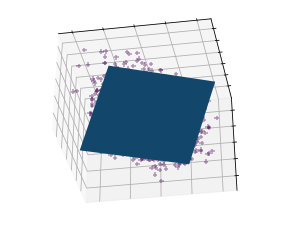

In [13]:
elev = -40
azim = -80
plot_figs(1, elev, azim)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

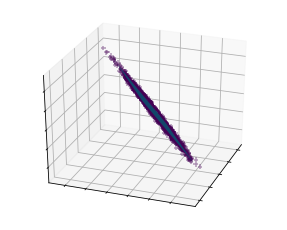

In [14]:
#Caso nao esteja funcionando a interacao com o grafico voce pode 
#plotar o grafico em outro ponto de vista.
elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()